# 20

In [87]:
array = []
start = None
end = None 

with open("input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


        


Start: (61, 55)
End: (67, 33)


In [ ]:
from heapq import heappush, heappop

# Run Dijkstra from both sides?  

def dijkstra(array, start, end, steps = -1): 
    # Use heap for this as (score, node) pairs. 
    start = start
    current = [(0, start)] 

    MAX_DISTANCE = len(array) * len(array[0]) + 1

    # Store the distances here. 
    distances = [[MAX_DISTANCE for _ in range(len(array[0]))] for _ in range(len(array))]
    distances[start[0]][start[1]] = 0

    # Dijsktras algorithm.
    while len(current) > 0 and steps != 0: 
        distance, node = heappop(current)

        #if node == end:
        #    print(f"Found end in {distance} steps")
        #    break # BREAK EARLY


        # Insert new neighbor
        neighbors = [(node[0] + 1, node[1]), 
                    (node[0] - 1, node[1]), 
                    (node[0], node[1] + 1), 
                    (node[0], node[1] - 1)] # R -> rotat
        
        for neighbor in neighbors:

            # Out of bounds
            if neighbor[0] < 0 or neighbor[0] >= len(array) or neighbor[1] < 0 or neighbor[1] >= len(array[0]):
                continue

            # Wall
            if array[neighbor[0]][neighbor[1]] == "#":
                continue

            cost = 1
        
            # Add new path
            if distance + cost < distances[neighbor[0]][neighbor[1]]:
                distances[neighbor[0]][neighbor[1]] = distance + cost
                heappush(current, (distance + cost, neighbor))

        # Limit execution
        if steps != -1: 
            steps -= 1

    # for printing
    for row in range(len(array)):
        for col in range(len(array[0])):
            if distances[row][col] == MAX_DISTANCE:
                distances[row][col] = -1
    return distances

In [101]:
distances = dijkstra(array, start, end, -1)   

Found end in 9416 steps


(-0.5, 140.5, 140.5, -0.5)

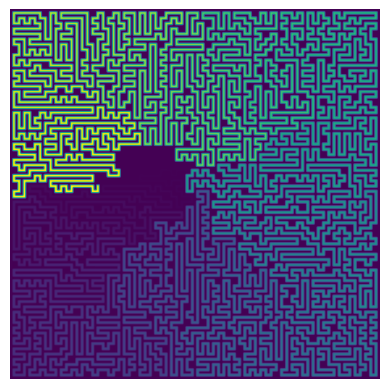

In [102]:
import matplotlib.pyplot as plt

plt.imshow(distances)
plt.axis("off")

In [103]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

In [104]:
distance_to_end = distances[end[0]][end[1]]

cheats = dict() 

for row in range(len(distances)):
    for col in range(len(distances)):
        # vertical_cheat
        if row + 2 < len(distances):
            if distances[row][col] >= 0 and distances[row+1][col] == -1 and distances[row+2][col] >= 0:
                savings = abs(distances[row][col] - distances[row+2][col]) - 2

                # does it really help? 

                if max(distances[row][col], distances[row+2][col]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row+1][col] = 0.5
                    cheat_dist[row+2][col] = 0


        # horizontal_cheat
        if col + 2 < len(distances[0]):
            if distances[row][col] >= 0 and distances[row][col+1] == -1 and distances[row][col+2] >= 0:
                savings = abs(distances[row][col] - distances[row][col+2]) - 2

                if max(distances[row][col], distances[row][col+2]) < distance_to_end + savings:
                    if savings in cheats:
                        cheats[savings] += 1
                    else:
                        cheats[savings] = 1

                    cheat_dist[row][col] = 0
                    cheat_dist[row][col+1] = 0.5
                    cheat_dist[row][col+2] = 0




(-0.5, 140.5, 140.5, -0.5)

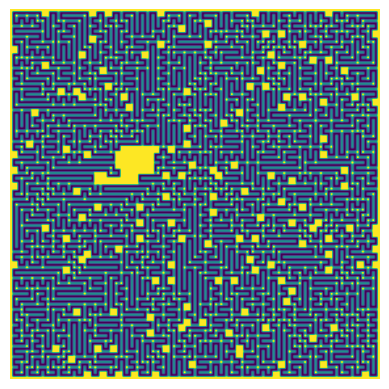

In [105]:
# Cheating plan :D 
plt.imshow(cheat_dist, cmap="viridis")
plt.axis("off")

In [114]:
result = 0 # number of cheats that save at least 100.

for savings, number_of_cheats in cheats.items():
    if savings >= 100:
        result += number_of_cheats

result

1395

# Part 2 

In [115]:
array = []
start = None
end = None 

with open("test_input.txt", "r") as f:
    for row, line in enumerate(f): 
        row_content = list(line.strip())
        array.append(row_content)

        for col, char in enumerate(row_content):
            if char == "S":
                print(f"Start: ({row}, {col})")
                start = (row, col)
            if char == "E":
                print(f"End: ({row}, {col})")
                end = (row, col)


Start: (3, 1)
End: (7, 5)


In [116]:
distances = dijkstra(array, start, end, -1)

Found end in 84 steps


In [117]:
from copy import deepcopy

cheat_dist = []

for row in range(len(array)):
    line = []
    for col in range(len(array[0])):
       
        if array[row][col] == "#":
            line.append(1)
        else:
            line.append(0)

    cheat_dist.append(line)

In [ ]:
# TODO: finish :) 
distance_to_end = distances[end[0]][end[1]]
cheats = dict() 
cheat_radius = 2

for row in range(len(distances)):
    for col in range(len(distances)):
        # no cheat on walls
        if distances[row][col] == -1:
            continue
        # Cheat around: find all tiles reachable in 20 steps from here. 
        for r in range(-cheat_radius, cheat_radius):
            for c in range(-cheat_radius, cheat_radius):
                if r == 0 and c == 0:
                    continue

                if row + r < 0 or row + r >= len(distances) or col + c < 0 or col + c >= len(distances[0]):
                    continue

                # Double check this one 
                if distances[row + r][col + c] >= 0:
                    savings = distances[row][col] - distances[row + r][col + c] - r-c

                    if savings <= 0: 
                        continue
 
                    if max(distances[row][col], distances[row + r][col + c]) < distance_to_end + savings:
                        if savings in cheats:
                            cheats[savings] += 1
                        else:
                            cheats[savings] = 1

                        cheat_dist[row][col] = 0
                        cheat_dist[row + r][col + c] = 0






In [138]:
cheats

{}

In [131]:
for savings, number in cheats.items():
    if savings >= 50: 
        print(f"Savings: {savings} Number: {number}")
